# 📷 Cifar-10 Image Classifiction

The `CIFAR-10` dataset consists of `60000` `32x32` color images in `10` classes, with `6000` images per class. There are `50000` training images and `10000` test images.

# 🔬 Problem Definition:

Given an image, can we predict the correct class of this image?

The images are very small (`32x32`) and by visualizing them you will notice how difficult it is to distinguish them even for a human.

In this notebook we are going to build a CNN model that can classify images of various objects. We have `10` class of images:
1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

# 🎯 Evaluation:

We have `10` classes, so if we pick a image and we randomly gues it class, we have `1/10` probability to be true.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

# 📥 Load the data

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

170498071/170498071 [==============================] - 6s 0us/step
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


# 🖼 Data Visualization

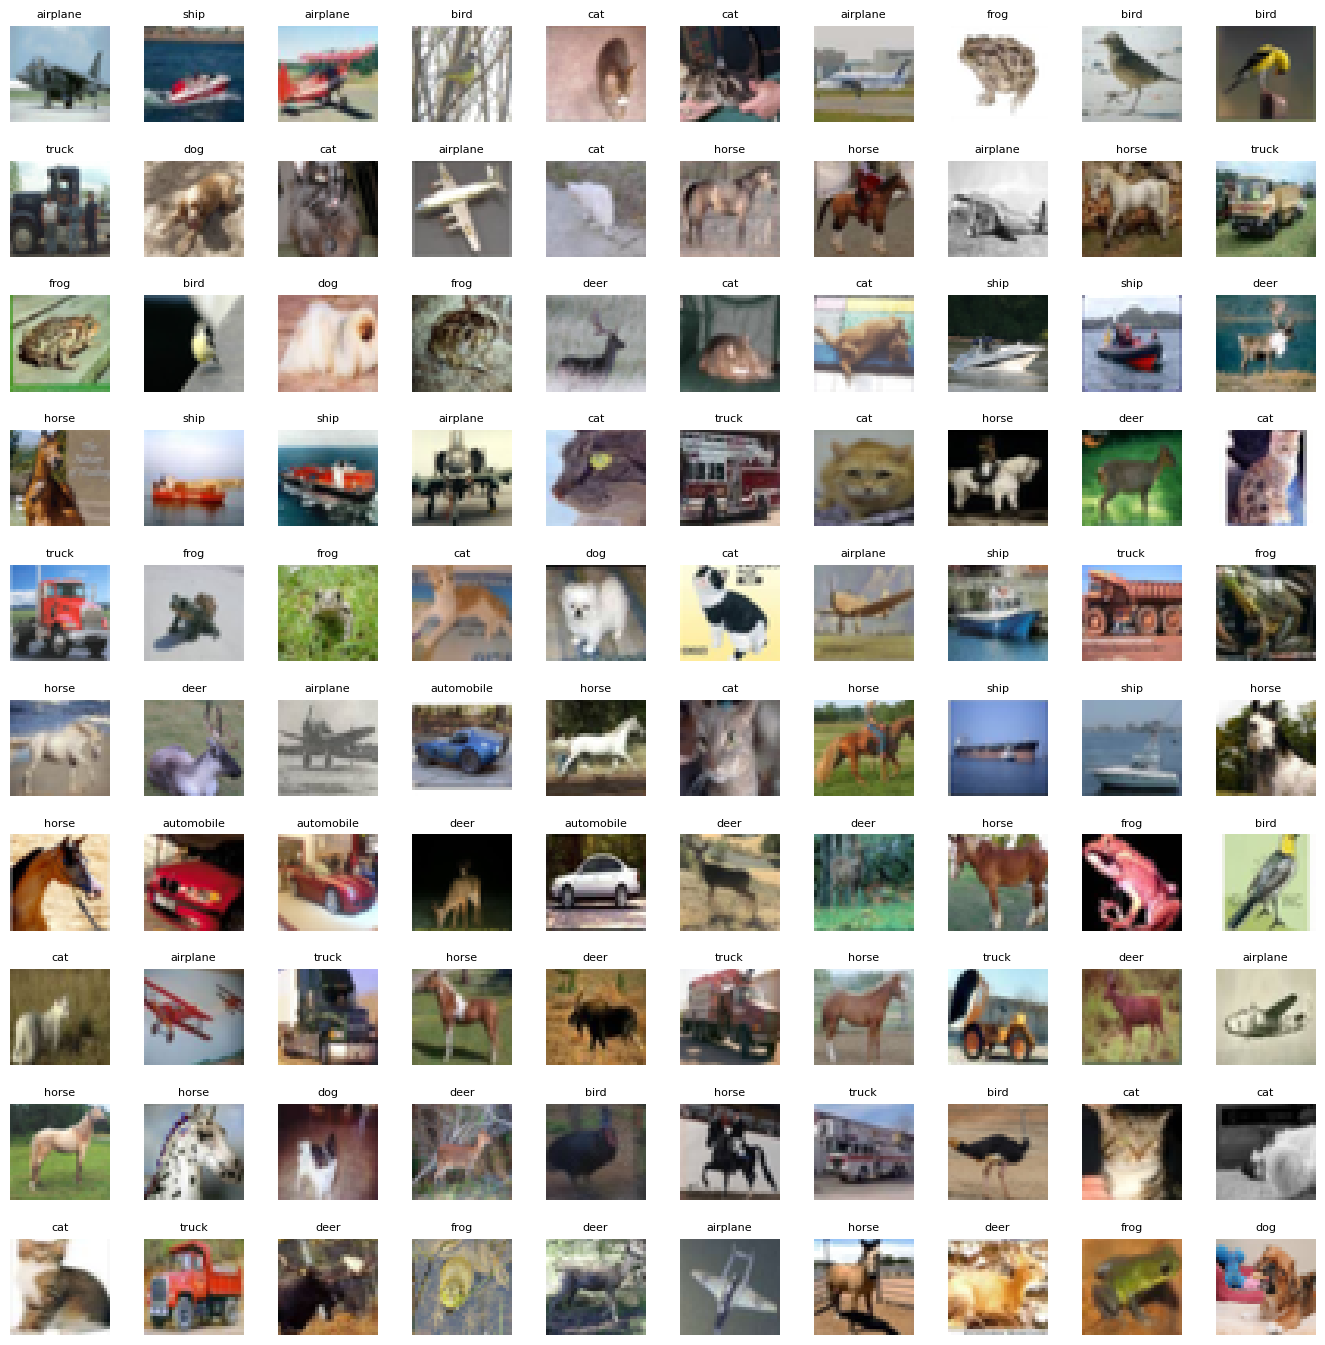

In [ ]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

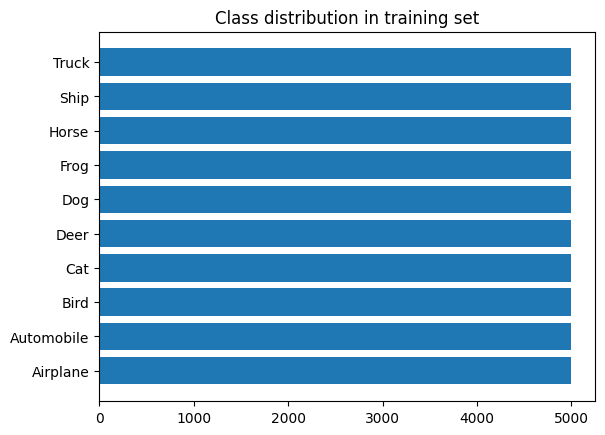

In [ ]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

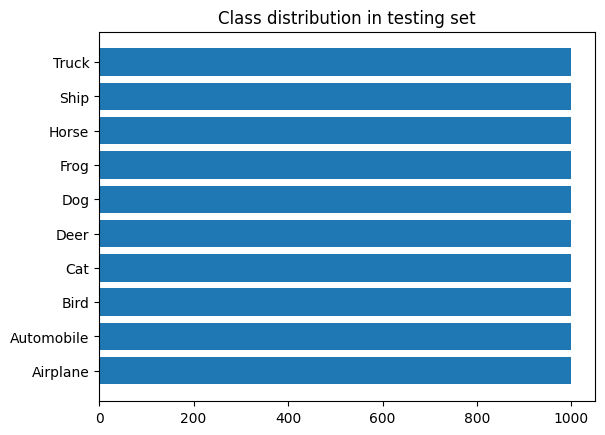

In [ ]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

The class are equally distributed

# 🔄 Data Preprocessing

In [ ]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [ ]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# 🤖 Model Building

In [ ]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(32, KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(2, 2))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(64, KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_4 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                      

## Early Stopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

## Data Augmentations

In [ ]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator,
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test),
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

Epoch 1/50
1562/1562 [==============================] - 60s 28ms/step - loss: 1.6144 - accuracy: 0.4211 - precision: 0.6304 - recall: 0.2115 - val_loss: 1.3346 - val_accuracy: 0.5376 - val_precision: 0.6674 - val_recall: 0.4011
Epoch 2/50
1562/1562 [==============================] - 45s 28ms/step - loss: 1.2158 - accuracy: 0.5693 - precision: 0.7328 - recall: 0.4103 - val_loss: 1.0416 - val_accuracy: 0.6353 - val_precision: 0.7639 - val_recall: 0.5056
Epoch 3/50
1562/1562 [==============================] - 44s 28ms/step - loss: 1.0385 - accuracy: 0.6383 - precision: 0.7708 - recall: 0.5070 - val_loss: 0.9287 - val_accuracy: 0.6839 - val_precision: 0.7695 - val_recall: 0.6049
Epoch 4/50
1562/1562 [==============================] - 43s 28ms/step - loss: 0.9311 - accuracy: 0.6815 - precision: 0.7926 - recall: 0.5654 - val_loss: 0.9019 - val_accuracy: 0.6964 - val_precision: 0.7892 - val_recall: 0.6119
Epoch 5/50
1562/1562 [==============================] - 44s 28ms/step - loss: 0.8627 - a

# 📊 Model Evaluation

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

In [ ]:
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

## Test on random image

In [ ]:
def plot_image(predictions_array, img, true_label=None):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)

    accuracy = f" ({labels[int(true_label)]})" if true_label != None else ""
    if predicted_label == true_label and true_label != None:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}%{accuracy}",
               color=color)

def plot_value_array(predictions_array, true_label=None):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    if true_label != None: thisplot[int(true_label)].set_color('blue')

In [ ]:
predictions = model.predict(X_test)

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(predictions[i], X_test[i], y_test[i])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(predictions[i], y_test[i])
plt.tight_layout()
plt.show()

In [ ]:
import requests
from PIL import Image
import cv2

def get_img(url):
  r = requests.get(url, stream=True)  # Download
  img = np.array(Image.open(r.raw))  # Convert to NP Array
  img = cv2.resize(img, (32, 32))  # Resize to match VGG16 input
  return img / 255.0

# Define a list of image URLs
urls = [
    "https://apahabar.s3.ap-southeast-1.amazonaws.com/storage/20230619/080950-garfield-webp-large.webp",
    "https://www.blibli.com/friends-backend/wp-content/uploads/2023/03/B300224-Cover-Fakta-Anjing-Husky-scaled.jpg",
    "https://cdn0-production-images-kly.akamaized.net/NIyhdKW2Oh7XNUU_s_KVjM74qE8=/1200x1200/smart/filters:quality(75):strip_icc():format(webp)/kly-media-production/medias/1053303/original/025149900_1447383884-13112015-anjing.jpg",
    "https://img.okezone.com/okz/500/content/2023/10/11/406/2898966/apakah-kucing-boleh-makan-tempe-berikut-penjelasannya-AUJSwpViXv.JPG"
]

imgs = []

# Loop through the URLs, download, preprocess, and classify the images
for u in range(0, len(urls)):
    img = get_img(urls[u])
    imgs.append(img)  # Collect all preprocessed images into imgs

imgs = np.array(imgs)  # Convert to Np Array

# Perform classification on the downloaded and preprocessed images
predictions = model.predict(imgs)

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 1
num_cols = 4
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(predictions[i], imgs[i])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(predictions[i])
plt.tight_layout()
plt.show()

# Define class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Loop through the results and print the predicted class labels
for i in range(len(urls)):
    predicted_class_index = np.argmax(predictions[i])
    predicted_class = class_labels[predicted_class_index]
    print(f"Image {i + 1}: Predicted Class - {predicted_class}")

In [ ]:
url = input("Masukan url: ")
r = requests.get(url, stream=True)  # Download
img = np.array(Image.open(r.raw))  # Convert to NP Array
plt.imshow(img)
plt.show()
print("\n")
img = get_img(url)
predict = model.predict(np.array([img]))
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
plot_image(predict, img)
plt.subplot(1, 2, 2)
plot_value_array(predict[0])
plt.tight_layout()
plt.show()

# Save the models

In [ ]:
from keras.models import load_model

model.save('cnn_20_epochs.h5')

In [ ]:
import tensorflow as tf
from keras.models import load_model# Load the model in HDF5 format
model = load_model('cifar10.h5')

# Convert the model to the SavedModel format
tf.saved_model.save(model, 'save/model')

In [ ]:
import shutil
tf.saved_model.save(model, 'save/model')
shutil.make_archive('model', 'zip', 'save/model')